<a href="https://colab.research.google.com/github/muhsufyan/feature-importance/blob/main/SHAP_xgboost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[data about Higher Education Students Performance Evaluation Dataset](https://archive.ics.uci.edu/ml/datasets/Higher+Education+Students+Performance+Evaluation+Dataset)

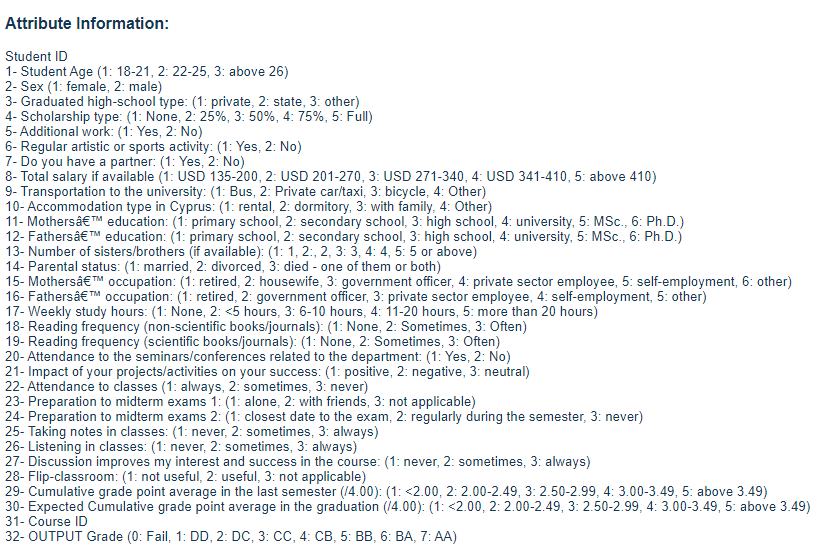

In [ ]:
import pandas as pd
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00623/DATA.csv", sep=";")
df

,STUDENT ID,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,COURSE ID,GRADE
0,STUDENT1,2,2,3,3,1,2,2,1,1,1,1,2,3,1,2,5,3,2,2,1,1,1,1,1,3,2,1,2,1,1,1,1
1,STUDENT2,2,2,3,3,1,2,2,1,1,1,2,3,2,1,2,1,2,2,2,1,1,1,1,1,3,2,3,2,2,3,1,1
2,STUDENT3,2,2,2,3,2,2,2,2,4,2,2,2,2,1,2,1,2,1,2,1,1,1,1,1,2,2,1,1,2,2,1,1
3,STUDENT4,1,1,1,3,1,2,1,2,1,2,1,2,5,1,2,1,3,1,2,1,1,1,1,2,3,2,2,1,3,2,1,1
4,STUDENT5,2,2,1,3,2,2,1,3,1,4,3,3,2,1,2,4,2,1,1,1,1,1,2,1,2,2,2,1,2,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,STUDENT141,2,1,2,3,1,1,2,1,1,2,1,2,2,2,2,4,3,3,2,1,1,1,1,1,2,1,2,1,3,3,9,5
141,STUDENT142,1,1,2,4,2,2,2,1,4,2,1,1,5,1,2,1,3,2,2,2,1,2,1,1,3,2,2,1,5,3,9,5
142,STUDENT143,1,1,1,4,2,2,2,1,1,1,3,4,4,1,2,4,2,2,2,1,1,1,1,1,3,3,2,1,4,3,9,1
143,STUDENT144,2,1,2,4,1,1,1,5,2,3,4,4,1,1,3,3,2,2,1,1,1,1,2,1,2,1,2,1,5,3,9,4


In [ ]:
# cek info data (tipe data, jumlah yg tdk Null/NaN)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   STUDENT ID  145 non-null    object
 1   1           145 non-null    int64 
 2   2           145 non-null    int64 
 3   3           145 non-null    int64 
 4   4           145 non-null    int64 
 5   5           145 non-null    int64 
 6   6           145 non-null    int64 
 7   7           145 non-null    int64 
 8   8           145 non-null    int64 
 9   9           145 non-null    int64 
 10  10          145 non-null    int64 
 11  11          145 non-null    int64 
 12  12          145 non-null    int64 
 13  13          145 non-null    int64 
 14  14          145 non-null    int64 
 15  15          145 non-null    int64 
 16  16          145 non-null    int64 
 17  17          145 non-null    int64 
 18  18          145 non-null    int64 
 19  19          145 non-null    int64 
 20  20        

In [ ]:
# cek missing value
df.isna().sum().sum()

0

In [ ]:
df2 = df.drop(["STUDENT ID"],axis=1)

In [ ]:
# cek semua nilai yg unik dan 
for col in df2:
    print(df2[col].value_counts())
    print("="*30)

2    70
1    65
3    10
Name: 1, dtype: int64
2    87
1    58
Name: 2, dtype: int64
2    103
1     25
3     17
Name: 3, dtype: int64
3    76
4    42
5    23
2     3
1     1
Name: 4, dtype: int64
2    96
1    49
Name: 5, dtype: int64
2    87
1    58
Name: 6, dtype: int64
2    84
1    61
Name: 7, dtype: int64
1    93
2    27
3    16
5     5
4     4
Name: 8, dtype: int64
1    98
2    25
4    21
3     1
Name: 9, dtype: int64
1    68
2    49
3    27
4     1
Name: 10, dtype: int64
1    54
3    39
2    27
4    21
5     2
6     2
Name: 11, dtype: int64
3    46
2    36
1    29
4    28
5     5
6     1
Name: 12, dtype: int64
2    45
1    27
3    26
5    24
4    23
Name: 13, dtype: int64
1    127
2     11
3      7
Name: 14, dtype: int64
2    103
4     18
3     16
1      6
5      2
Name: 15, dtype: int64
4    38
1    36
3    35
2    22
5    14
Name: 16, dtype: int64
2    74
3    30
1    29
4     8
5     4
Name: 17, dtype: int64
2    99
1    27
3    19
Name: 18, dtype: int64
2    103
3     22
1     

In [ ]:
# cek apakah outputnya imbalance ?
df2["GRADE"].value_counts()

1    35
2    24
3    21
5    17
7    17
6    13
4    10
0     8
Name: GRADE, dtype: int64

In [ ]:
# lihat imbalance dlm %
(df2["GRADE"].value_counts()/145)*100

1    24.137931
2    16.551724
3    14.482759
5    11.724138
7    11.724138
6     8.965517
4     6.896552
0     5.517241
Name: GRADE, dtype: float64

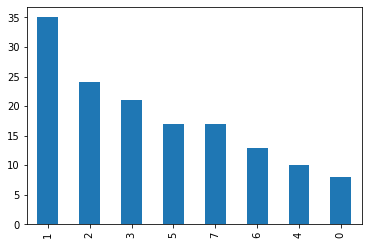

In [ ]:
im = df["GRADE"].value_counts()
im.plot(kind="bar")

outputnya balance. 

kita coba lihat model XGBOOST

In [ ]:
category = {0: 'FAIL', 1: 'DD', 2: 'DC',  3: 'CC', 4: 'CB', 5: 'BB', 6: 'BA', 7:'AA' }
y = df["GRADE"].map(category)

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
y = le.fit_transform(y)

[0]	validation_0-mlogloss:1.94245	validation_1-mlogloss:2.06128
[1]	validation_0-mlogloss:1.83005	validation_1-mlogloss:2.05654
[2]	validation_0-mlogloss:1.73088	validation_1-mlogloss:2.05647
[3]	validation_0-mlogloss:1.63523	validation_1-mlogloss:2.04567
[4]	validation_0-mlogloss:1.54769	validation_1-mlogloss:2.04033
[5]	validation_0-mlogloss:1.47014	validation_1-mlogloss:2.04215
[6]	validation_0-mlogloss:1.39764	validation_1-mlogloss:2.04138
[7]	validation_0-mlogloss:1.32972	validation_1-mlogloss:2.04998
[8]	validation_0-mlogloss:1.27514	validation_1-mlogloss:2.05355
[9]	validation_0-mlogloss:1.21836	validation_1-mlogloss:2.06066
[10]	validation_0-mlogloss:1.16754	validation_1-mlogloss:2.06652
[11]	validation_0-mlogloss:1.11513	validation_1-mlogloss:2.07484
[12]	validation_0-mlogloss:1.07054	validation_1-mlogloss:2.07988
[13]	validation_0-mlogloss:1.02444	validation_1-mlogloss:2.09063
[14]	validation_0-mlogloss:0.982482	validation_1-mlogloss:2.10129
[15]	validation_0-mlogloss:0.94518

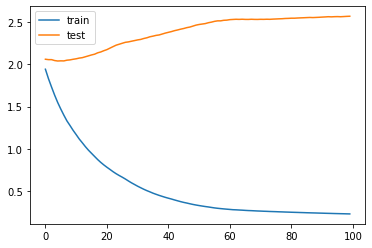

In [ ]:
# plot learning curve of an xgboost model
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from matplotlib import pyplot
# define dataset
X = df.iloc[:,1:32]
y = y
# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.80, random_state=42)
# define the model
model = XGBClassifier(objective='multi:softmax', num_class = 8)
# define the datasets to evaluate each iteration
evalset = [(X_train, y_train), (X_test,y_test)]
# fit the model
model.fit(X_train, y_train, eval_metric='mlogloss', eval_set=evalset)
# evaluate performance
yhat = model.predict(X_test)
score = accuracy_score(y_test, yhat)
print('Accuracy: %.3f' % score)
# retrieve performance metrics
results = model.evals_result()
# plot learning curves
pyplot.plot(results['validation_0']['mlogloss'], label='train')
pyplot.plot(results['validation_1']['mlogloss'], label='test')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

akurasinya jelek, ini wajar karena banyak data kategori tp semuanya menggunakan teknik label encoder bukan one hot encoder pd data train. fokus kali ini adalah membandingkan feature importance SHAP vs FIRE pd model xgboost jd kita hanya melihat dari data yg blm dilakukan preprocessing feature mana saja yg dianggap paling penting

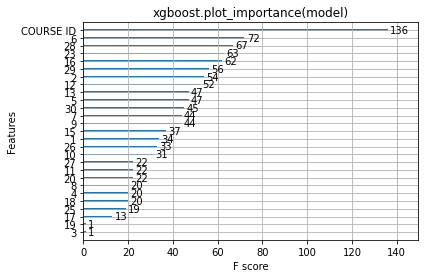

In [ ]:
import matplotlib.pylab as pl
import xgboost
xgboost.plot_importance(model)
pl.title("xgboost.plot_importance(model)")
pl.show()

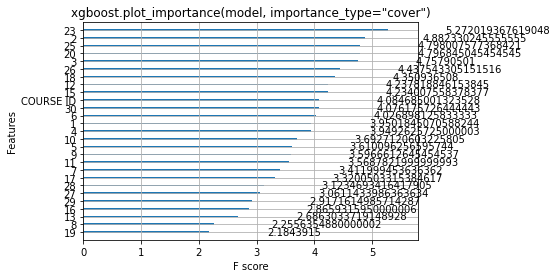

In [ ]:
xgboost.plot_importance(model, importance_type="cover")
pl.title('xgboost.plot_importance(model, importance_type="cover")')
pl.show()

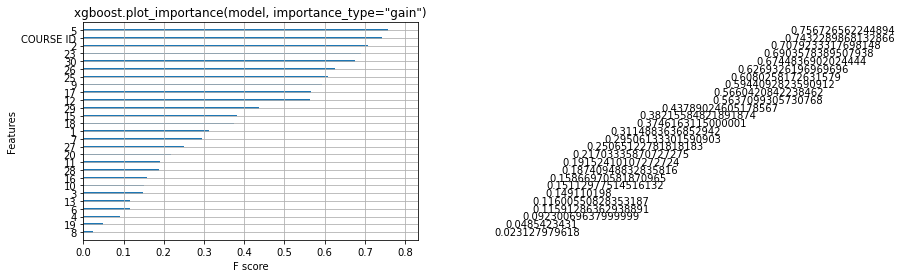

In [ ]:
xgboost.plot_importance(model, importance_type="gain")
pl.title('xgboost.plot_importance(model, importance_type="gain")')
pl.show()

diatas adlh feature importance berdsrkan weight(default), cover, dan gain

# SHAP

In [ ]:
!pip install shap

     |████████████████████████████████| 564 kB 7.3 MB/s 


In [ ]:
import shap
import numpy as np
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)

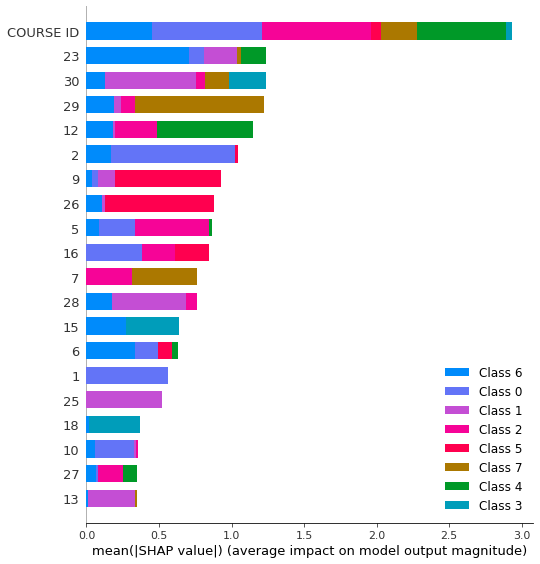

In [ ]:
shap.summary_plot(shap_values, X, plot_type="bar")

variabel COURSE ID sangat penting bagi model, ini sama sprti feature importance bawaan dari xgboost